In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('IRIS.csv')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.shape

(150, 5)

In [8]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [9]:
df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [10]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

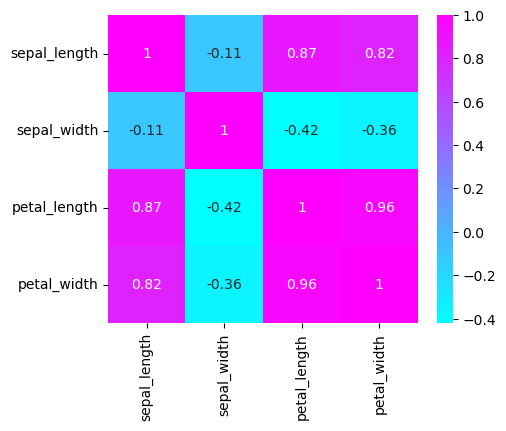

In [12]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'cool')

In [26]:
df['species'].value_counts()


0    50
1    50
2    50
Name: species, dtype: int64

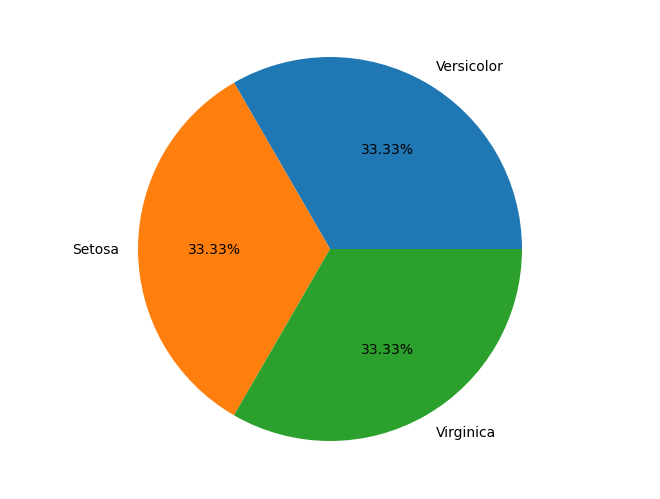

In [29]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
#converting the string values of species column into numeric values using le.fit_transform(label encoder)
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [16]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['species'])
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print('Training set length: {}.\nTest set length: {}'.format(X_train.shape[0], X_test.shape[0]))

Training set length: 120.
Test set length: 30


In [17]:
#model.fit is used to call the x and y 
model.fit(X_train, y_train)
# x_train is for input and y_train is for output

LogisticRegression()

In [18]:
# printing metric to get performance
print("Accuracy of the model after testing : ",model.score(X_test,y_test))

Accuracy of the model after testing :  1.0


In [19]:
# Make sure to adjust the column names based on your actual dataset
column = 'petal_width'

# Create a new column 'predicted_species' based on petal width
df['predicted_species'] = df[column].apply(lambda x: 
    'Setosa' if x < 1.0 else ('Versicolor' if 1.0 <= x <=1.8 else 'Virginica'))

# Display the result
print(df[['petal_width', 'predicted_species']])

     petal_width predicted_species
0            0.2            Setosa
1            0.2            Setosa
2            0.2            Setosa
3            0.2            Setosa
4            0.2            Setosa
..           ...               ...
145          2.3         Virginica
146          1.9         Virginica
147          2.0         Virginica
148          2.3         Virginica
149          1.8        Versicolor

[150 rows x 2 columns]


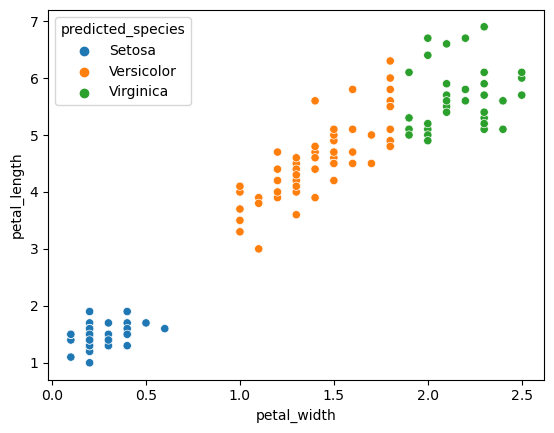

In [20]:
sns.scatterplot(x=df['petal_width'], y=df['petal_length'], hue=df['predicted_species'])
plt.show()

In [21]:
# Replace these column names with the actual column names from your DataFrame
sepal_length = df['sepal_length']
sepal_width = df['sepal_width']
petal_width = df['petal_width']
petal_length = df['petal_length']

# Conditions for Setosa
condition_setosa = (4.1 <= sepal_length) & (sepal_length <= 5.9) & (2.0 <= sepal_width) & (sepal_width <= 4.5) & (1.0 <= petal_width) & (petal_width <= 1.9) & (0.1 <= petal_width) & (petal_width <= 0.6)

# Conditions for versicolor
condition_versicolor = (4.9 <= sepal_length) & (sepal_length <= 6.9) & (2.0 <= sepal_width) & (sepal_width <= 3.3) & (3.0 <= petal_width) & (petal_width <= 4.9) & (1.0 <= petal_width) & (petal_width <= 1.7)

# Conditions for virginica
condition_virginica = (4.9 <= sepal_length) & (sepal_length <= 8.0) & (2.5 <= sepal_width) & (sepal_width <= 3.8) & (4.5 <= petal_width) & (petal_width <= 6.9) & (1.5 <= petal_width) & (petal_width <= 2.5)

# Print 'predicted_species' when the conditions are met for Setosa
if condition_setosa.any():
    print(df.loc[condition_setosa, 'predicted_species'])

# Print 'predicted_species' when the conditions are met for versicolor
if condition_versicolor.any():
    print(df.loc[condition_versicolor, 'predicted_species'])

# Print 'predicted_species' when the conditions are met for virginica
if condition_virginica.any():
    print(df.loc[condition_virginica, 'predicted_species'])


In [22]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_species
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,Virginica
146,6.3,2.5,5.0,1.9,2,Virginica
147,6.5,3.0,5.2,2.0,2,Virginica
148,6.2,3.4,5.4,2.3,2,Virginica


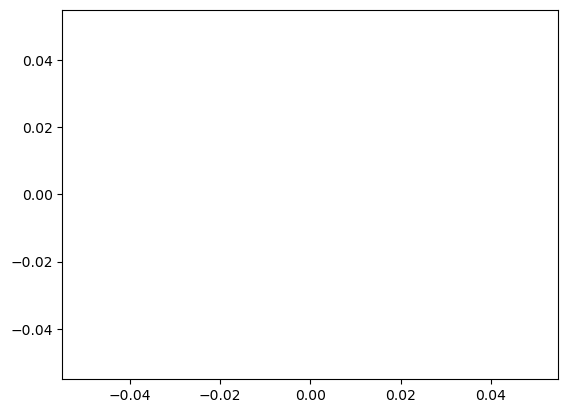

In [40]:
# Scatter plot for Setosa
sns.histplot(x=df[condition_setosa]['petal_width'], y=df[condition_setosa]['petal_length'], label='Setosa', color='blue')

# Scatter plot for Versicolor
sns.histplot(x=df[condition_versicolor]['petal_width'], y=df[condition_versicolor]['petal_length'], label='Versicolor', color='orange')

# Scatter plot for Virginica
sns.histplot(x=df[condition_virginica]['petal_width'], y=df[condition_virginica]['petal_length'], label='Virginica', color='green')


plt.plot()
# Display the plot
plt.show()





In [47]:
# Now you can use these variables in your conditions
sepal_length = df['sepal_length']
sepal_width = df['sepal_width']
petal_length = df['petal_length']
petal_width = df['petal_width']

# Conditions for Setosa
is_setosa = (4.1 <= sepal_length) & (sepal_length <= 5.9) & (2.0 <= sepal_width) & (sepal_width <= 4.5) & (1.0 <= petal_width) & (petal_width <= 1.9) & (0.1 <= petal_length) & (petal_length <= 0.6)

# Conditions for Versicolor
is_versicolor = (4.9 <= sepal_length) & (sepal_length <= 6.9) & (2.0 <= sepal_width) & (sepal_width <= 3.3) & (3.0 <= petal_width) & (petal_width <= 5.0) & (1.0 <= petal_length) & (petal_length <= 1.7)

# Conditions for Virginica
is_virginica = (4.9 <= sepal_length) & (sepal_length <= 8.0) & (2.5 <= sepal_width) & (sepal_width <= 3.8) & (4.5 <= petal_width) & (petal_width <= 6.9) & (1.5 <= petal_length) & (petal_length <= 2.5)

# Check if the conditions are met for Setosa, Versicolor, and Virginica
if is_setosa.any():
    print("Setosa.")
else:
    print("not Setosa.")

if is_versicolor.any():
    print("Versicolor.")
else:
    print("not Versicolor.")

if is_virginica.any():
    print("Virginica.")
else:
    print("not Virginica.")

not Setosa.
not Versicolor.
not Virginica.
